## *De novo* assembly with Flye

Flye is a *de novo* assembler for long and noisy reads, such as those produced by PacBio and ONT, developed by [Kolmogorov et al](2018). Flye implements an algorithm that builds the ABruijn (assembly) graph from long error-prone reads and features many new improvements. It also has a polished module that produces the final assembly. As a difference with other existing assemblers, Flye does not attempt to construct accurate contigs (at least at the initial assembly stage) but instead generates arbitrary paths in the unknown assembly graph and, further, an assembly graph is built from these paths. Although Flye constructs overlapping contigs with possible assembly errors at the initial stage, they are combined into an accurate assembly graph and the repetitions in the assembly graph are resolved by using small variations between several repeat instances that were left unresolved during the initial assembly stage. Finally, the algorithm constructs a new and less tangled assembly graph, in which the accurate contigs as represented as paths.

Flye have been tested against several assemblers to demonstrate that it generates better or comparable assemblies and performs 2-10 times faster than hierarchical assembly pipelines. Our own experience shows that Flye was by far one of the most accurate alternatives (along with Canu), although it was much less computationally expensive. Flye can generate contiguous and precise assemblies with any type of genome, even with large genomes. 

### Flye basic arguments:

- **--nanoraw**: Reads file of ONT reads. The input reads can be in FASTA or FASTQ format, uncompressed or compressed with gz.
- **--out-dir**: Output directory.
- **--genome-size**: An estimate of the genome size must be provided (e.g. 5m or 2.6g). The estimate could be rough (e.g. within 0.5x-2x range) and does not affect the other assembly stages.
- **--threads**: Number of threads to be used in the assembly.
- **--subassemblies**: Multiple high-quality contigs input. This option allows performing a consensus assembly of multiple sets of high-quality contigs by specifying multiple files separated by spaces.
- **--asm-coverage**: The assemblies of large genomes at high coverage typically require a lot of RAM. In order to reduce memory consumption, this option can be used to specify a subset of the longest reads for initial contig assembly (the developer recommends 40x coverage to produce enough good draft contigs). Regardless of this parameter, all reads will be later used for repeat graph analysis.

Currenlty, Flye supports both raw and corrected reads. The expected error rates are <30% for raw and <2% for corrected reads.

In [ ]:
!flye --nano-raw data/sample/reads.fastq --out-dir data/sample/flye_output2 --genome-size 2.1m --threads 2

Flye also outputs an assembly graph in .gv format that can be visualized using Graphviz. The graph edges represent genomic sequences and nodes serve as junctions. Each edge is labelled with its ID, length and coverage. Repetitive edges are shown in color, while unique edges are shown in black.

In [ ]:
!dot -Tpng -O data/sample/flye_output/assembly_graph.gv

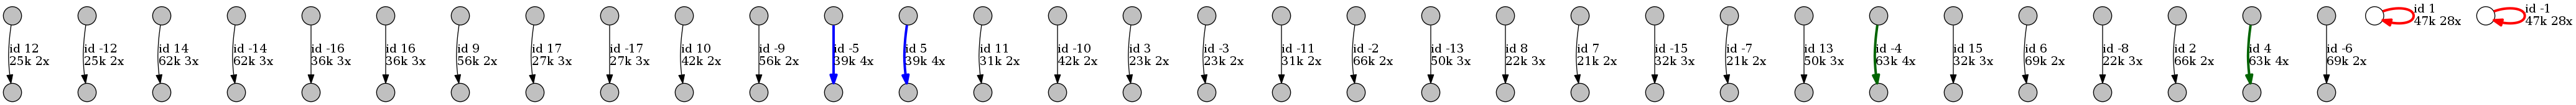

In [1]:
#Show output of Graphviz conversion to PNG (dot command)
from IPython.display import Image
Image("data/sample/flye_output/assembly_graph.gv.png")

### References

<a id='flye1'>[1]</a> Kolmogorov M., Yuan J., Lin Y. and Pevzner P. (2018). "Assembly of Long Error-Prone Reads Using Repeat Graphs". DOI: https://doi.org/10.1101/247148 

<a id='flye2'>[2]</a> Kolmogorov M., Yuan J., Lin Y. and Pevzner P. (2018). Supplementary files for the manuscript "Assembly of Long Error-Prone Reads Using Repeat Graphs" (Version 2.0) [Data set]. Zenodo. http://doi.org/10.5281/zenodo.1422834

[3] Lin Y., Yuan J., Kolmogorov M., Shen M.W., Chaisson M. and Pevzner P. (2016). "Assembly of Long Error-Prone Reads Using de Bruijn Graphs", PNAS URL www.pnas.org/content/113/52/E8396

<a id='bioconda'>[4]</a> Bioconda,  channel for the conda package manager specializing in bioinformatics software. URL
https://bioconda.github.io/ 

<a id='flye3'>[5]</a> Kolmogorov M. (2018). Flye assembler. GitHub. URL
https://github.com/fenderglass/Flye